# Notebook 4c: RAxML tree inference (backbone)


In [38]:
import ipyrad.analysis as ipa
import numpy as np
import pandas as pd
import toytree

### Datafiles

In [5]:
SEQS = "../analysis-ipyrad/Strept_min4_outfiles/Strept_min4.seqs.hdf5"

In [33]:
df = pd.read_csv("../data_sample_info/mastersheetSamples_RADstrep_20191017.csv")
keep = {'taxa': df[df['4balanced'] == 1].tip_label_ivalu.tolist()}
len(keep['taxa'])

48

### Get a subsampled alignment

In [35]:
wex = ipa.window_extracter(
    data=SEQS,
    name="strept-backbone",
    workdir="../analysis-window_extracter",
    scaffold_idxs=range(100000),
    imap=keep,
    mincov=10,
    rmincov=0.05,
)
wex.stats

,scaffold,start,end,sites,snps,missing,samples
0,concatenated,0,956078,956078,56848,0.522,48


In [36]:
wex.run(force=True)

Wrote data to /home/deren/Documents/CachoRAD/analysis-window_extracter/strept-backbone.phy


### Infer a concatenation tree

In [37]:
rax = ipa.raxml(
    data="../analysis-window_extracter/strept-backbone.phy",
    name="strept-backbone",
    workdir="../analysis-raxml",
    T=35,
    N=100,
)
print(rax.command)
rax.run()

/home/deren/miniconda3/bin/raxmlHPC-PTHREADS-AVX2 -f a -T 35 -m GTRGAMMA -n strept-backbone -w /home/deren/Documents/CachoRAD/analysis-raxml -s /home/deren/Documents/CachoRAD/analysis-window_extracter/strept-backbone.phy -p 54321 -N 100 -x 12345
job strept-backbone finished successfully


### Draw the tree

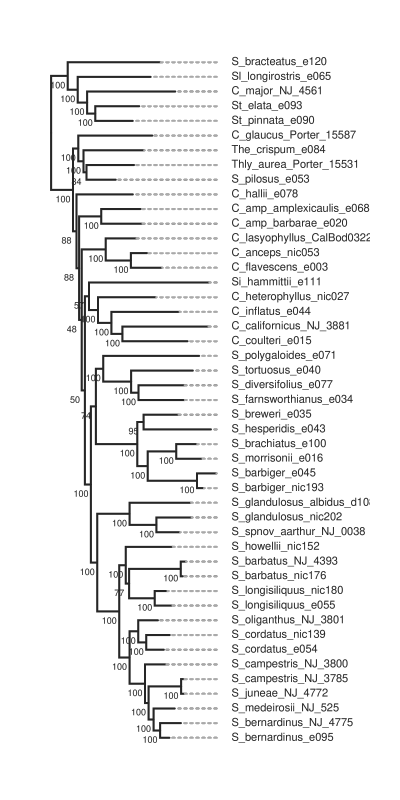

In [43]:
# load tree, root, and drop outgroups
tre = toytree.tree("../analysis-raxml/RAxML_bipartitions.strept-backbone")
tre = tre.root("Sy_irio_NJ_3877")
tre = tre.drop_tips(["Sy_irio_NJ_3877"])

# draw with colored clades
canvas, axes, mark = tre.draw(
    height=800,
    width=400,
    tip_labels_align=True,
    #tip_labels_colors=colors,
    #edge_colors=tre.get_edge_values_mapped(CLADES),
    node_labels="support",
    node_labels_style={"-toyplot-anchor-shift": "-10px", "baseline-shift": "-10px"}
);

import toyplot.svg
toyplot.svg.render(canvas, "../figures/tree-raxml-backbone-min10.svg")
canvas